In [1]:
!pip install labelme albumentations

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.4 MB 825.8 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.4 MB 2.2 MB/s eta 0:00:01
     ------------ --------------------------- 0.4/1.4 MB 2.8 MB/s eta 0:00:01
     -------------- ------------------------- 0.5/1.4 MB 2.8 MB/s eta 0:00:01
     ------------------- -------------------- 0.7/1.4 MB 3.1 MB/s eta 0:00:01
     -------------------- ------------------- 0.7/1.4 MB 2.8 MB/s eta 0:00:01
     --------------------- ------------------ 0.8/1.4 MB 2.4 MB/s eta 0:00:01
     ----------------------- ---------------- 0.8/1.4 MB 2.4 MB/s eta 0:00:01
     ------------------------- -------------- 0.9/1.4 MB 2.2 MB/s eta 0:00:01
     ------------------------- -------------- 0.9/1.4 MB 2.2 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.4 MB 1.9 MB/s eta 0:00:0

In [15]:
!pip install opencv-python


In [21]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
albucore                     0.0.7
albumentations               1.4.8
annotated-types              0.7.0
asttokens                    2.4.1
astunparse                   1.6.3
beautifulsoup4               4.12.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
filelock                     3.14.0
flatbuffers                  24.3.25
fonttools                    4.52.4
gast                         0.4.0
gdown                        5.2.0
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
g

In [22]:
cv2.getBuildInformation()

'\nGeneral configuration for OpenCV 4.10.0 =====================================\n  Version control:               4.10.0\n\n  Platform:\n    Timestamp:                   2024-06-03T17:02:09Z\n    Host:                        Windows 10.0.17763 AMD64\n    CMake:                       3.24.2\n    CMake generator:             Visual Studio 14 2015\n    CMake build tool:            MSBuild.exe\n    MSVC:                        1900\n    Configuration:               Debug Release\n\n  CPU/HW features:\n    Baseline:                    SSE SSE2 SSE3\n      requested:                 SSE3\n    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2\n      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX\n      SSE4_1 (16 files):         + SSSE3 SSE4_1\n      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2\n      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX\n      AVX (8 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX\n      AVX2 (36 files): 

In [2]:
import os
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [ ]:
[(659,383,1245,1077)],
[(615,371,1176,1077)],
[(499,306,1033,1058)],
[(549,344,1096,1076)],[(669,358,1242,1077)],[(664,382,1247,1077)],
[(487,291,1017,1043)],[(,469,265,992,1009)],[(667,378,1243,1077)],[(659,344,1229,1077)],
[(647,382,1226,1077)],
[(480,279,1005,1029)],[(673,377,1249,1077)],[(659,344,1229,1077)],
[(636,379,1206,1077)],[(673,367,1244,1077)],
[(522,321,1060,1070)],[(670,379,1247,1077)],[(,471,267,995,1012)],
[(583,356,1138,1077)],

In [ ]:
(659,383,1245,1077),
(615,371,1176,1077),
(499,306,1033,1058),
(549,344,1096,1076),(669,358,1242,1077),(664,382,1247,1077),
(487,291,1017,1043),(469,265,992,1009),(667,378,1243,1077),(659,344,1229,1077),
(647,382,1226,1077),
(480,279,1005,1029),(673,377,1249,1077),(659,344,1229,1077),
(636,379,1206,1077),(673,367,1244,1077),
(522,321,1060,1070),(670,379,1247,1077),(471,267,995,1012),
(583,356,1138,1077),

In [ ]:
[(659, 383, 586, 694)],
    [(615, 371, 561, 706)],
    [(499, 306, 534, 725)],
    [(549, 344, 547, 732)],
    [(669, 358, 573, 720)],
    [(664, 382, 580, 681)],
    [(487, 291, 526, 752)],
    [(469, 265, 523, 744)],
    [(667, 378, 576, 700)],
    [(659, 344, 570, 720)],
    [(647, 382, 580, 701)],
    [(480, 279, 526, 750)],
    [(673, 377, 577, 700)],
    [(659, 344, 570, 720)],
    [(636, 379, 571, 698)],
    [(673, 367, 573, 703)],
    [(522, 321, 538, 749)],
    [(670, 379, 577, 700)],
    [(471, 267, 528, 745)],
   [(583, 356, 555, 720)]

In [5]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('collecting image{}'.format(imgnum))
    ret, frame = cap.read()
    if ret == False:
        print('frame is empty')
        break
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    try:
        cv2.imwrite(imgname,frame)
        cv2.imshow('frame',frame)
        time.sleep(0.5)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    except:
        print('frame is empty')
cap.release()
cv2.destroyAllWindows()

collecting image0
collecting image1
collecting image2
collecting image3
collecting image4
collecting image5
collecting image6
collecting image7
collecting image8
collecting image9
collecting image10
collecting image11
collecting image12
collecting image13
collecting image14
collecting image15
collecting image16
collecting image17
collecting image18
collecting image19
collecting image20
collecting image21
collecting image22
collecting image23
collecting image24
collecting image25
collecting image26
collecting image27
collecting image28
collecting image29


In [8]:
!labelme

2024-06-05 12:46:12,947 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\pscha\.labelmerc
2024-06-05T07:16:23.344ZE [11888:NonCelloThread] registry_win.h:57:GetProtoFromRegistryValue Opening registry key Software\Google\DriveFS\Share failed with 0x2
2024-06-05T07:16:39.160ZE [11888:NonCelloThread] registry_win.h:57:GetProtoFromRegistryValue Opening registry key Software\Google\DriveFS\Share failed with 0x2
2024-06-05T07:17:36.078ZE [5576:NonCelloThread] registry_win.h:57:GetProtoFromRegistryValue Opening registry key Software\Google\DriveFS\Share failed with 0x2


In [4]:
import tensorflow as tf 
import cv2
import json
import numpy as np
from  matplotlib import pyplot as plt

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [8]:
images.as_numpy_iterator().next() 

NameError: name 'images' is not defined

In [25]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [31]:
images = images.map(load_image)

In [32]:
images.as_numpy_iterator().next()

array([[[108, 136, 157],
        [108, 136, 157],
        [109, 137, 158],
        ...,
        [108, 139, 159],
        [110, 138, 159],
        [109, 137, 158]],

       [[108, 136, 157],
        [108, 136, 157],
        [108, 136, 157],
        ...,
        [108, 139, 159],
        [110, 138, 159],
        [109, 137, 158]],

       [[108, 136, 157],
        [108, 136, 157],
        [108, 136, 157],
        ...,
        [108, 139, 159],
        [110, 138, 159],
        [109, 137, 158]],

       ...,

       [[107, 136, 150],
        [107, 136, 150],
        [106, 138, 151],
        ...,
        [108, 136, 148],
        [108, 137, 151],
        [104, 133, 147]],

       [[107, 136, 150],
        [108, 137, 151],
        [109, 138, 152],
        ...,
        [107, 135, 147],
        [108, 138, 149],
        [103, 133, 144]],

       [[107, 136, 150],
        [108, 137, 151],
        [109, 138, 152],
        ...,
        [103, 131, 143],
        [106, 136, 147],
        [106, 136, 147]]

In [33]:
 type(images)


tensorflow.python.data.ops.dataset_ops.MapDataset

In [34]:
image_generator = images.batch(4).as_numpy_iterator()

In [35]:
plot_images = image_generator.next()

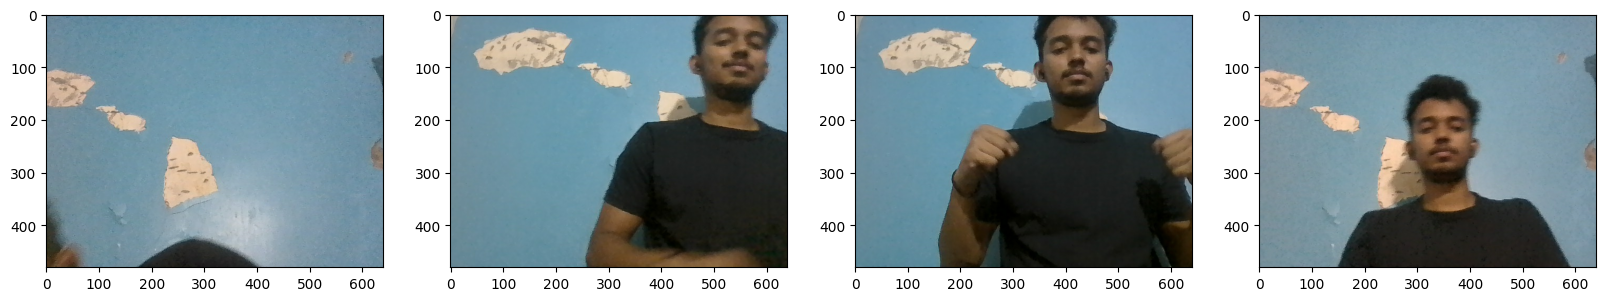

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [38]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [11]:
import albumentations as alb

In [12]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [13]:
img = cv2.imread(os.path.join('data','train', 'images','46444115-2305-11ef-964e-3ce9f7d245dc.jpg'))

In [14]:
img

array([[[117,  89,  35],
        [114,  86,  32],
        [116,  88,  34],
        ...,
        [114,  88,  28],
        [116,  90,  30],
        [ 98,  72,  12]],

       [[116,  88,  34],
        [114,  86,  32],
        [116,  88,  34],
        ...,
        [105,  79,  19],
        [115,  89,  29],
        [105,  79,  19]],

       [[115,  87,  33],
        [114,  86,  32],
        [116,  88,  34],
        ...,
        [101,  75,  15],
        [119,  93,  33],
        [117,  91,  31]],

       ...,

       [[109,  86,  30],
        [112,  89,  33],
        [112,  89,  33],
        ...,
        [109,  82,  26],
        [109,  82,  26],
        [129, 102,  46]],

       [[110,  87,  31],
        [108,  85,  29],
        [106,  83,  27],
        ...,
        [ 99,  72,  16],
        [ 89,  62,   6],
        [118,  91,  35]],

       [[105,  82,  26],
        [104,  81,  25],
        [104,  81,  25],
        ...,
        [126,  99,  43],
        [ 97,  70,  14],
        [112,  85,  29]]

In [15]:
with open(os.path.join('data', 'train', 'labels', '46444115-2305-11ef-964e-3ce9f7d245dc.json'), 'r') as f:
    label = json.load(f)

In [16]:
label['shapes'][0]['points']

[[226.94444444444446, 44.629629629629676],
 [451.01851851851853, 316.85185185185185]]

In [17]:

coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [18]:
coords

[226.94444444444446,
 44.629629629629676,
 451.01851851851853,
 316.85185185185185]

In [19]:

coords = list(np.divide(coords, [640,480,640,480]))

In [20]:
coords

[0.3546006944444445,
 0.09297839506172849,
 0.7047164351851852,
 0.660108024691358]

In [21]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [58]:
augmented

{'image': array([[[106,  73,   0],
         [100,  66,   0],
         [105,  72,   0],
         ...,
         [105,  66,   0],
         [112,  73,   4],
         [112,  73,   4]],
 
        [[126,  93,  15],
         [138, 104,  27],
         [147, 113,  36],
         ...,
         [106,  65,   0],
         [109,  67,   0],
         [111,  70,   0]],
 
        [[113,  80,   3],
         [109,  75,   0],
         [108,  74,   0],
         ...,
         [105,  64,   0],
         [105,  64,   0],
         [106,  65,   0]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 97,  68,   0],
         [ 94,  65,   0],
         [ 96,  67,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [108,  79,   5],
         [102,  73,   0],
         [103,  74,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 95,  66,

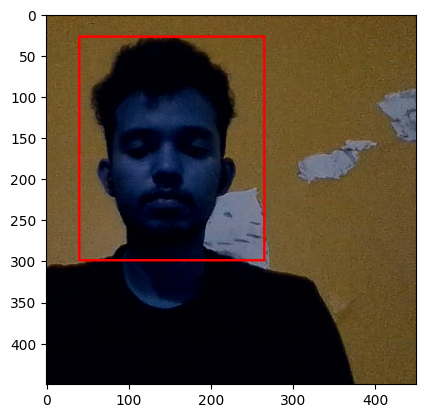

In [22]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image']) 

In [23]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.994068287037037, 0.0852623456790124, 0.8247974537037036, 0.7372685185185186, 'face'].


In [26]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [27]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [28]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [29]:
def load_labels(label_path):
    with open(label_path.numpy(),'r',encoding='utf-8') as f:
        label = json.load(f)
    return [label['class']],label['bbox']

In [30]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [31]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [32]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [33]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.0977, 0.0503, 0.5957, 0.6553], dtype=float16))

In [34]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)
 

(3720, 3720, 780, 780, 840, 840)

In [35]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [41]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.5054, 0.311 , 0.867 , 0.729 ],
        [0.    , 0.    , 0.3901, 0.3838],
        [0.399 , 0.18  , 0.761 , 0.6245],
        [0.671 , 0.    , 1.    , 0.4246],
        [0.26  , 0.2646, 0.659 , 0.7627],
        [0.    , 0.308 , 0.3542, 0.9976],
        [0.603 , 0.3804, 1.    , 0.9917],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

In [42]:
data_samples = train.as_numpy_iterator()

In [121]:
res = data_samples.next()

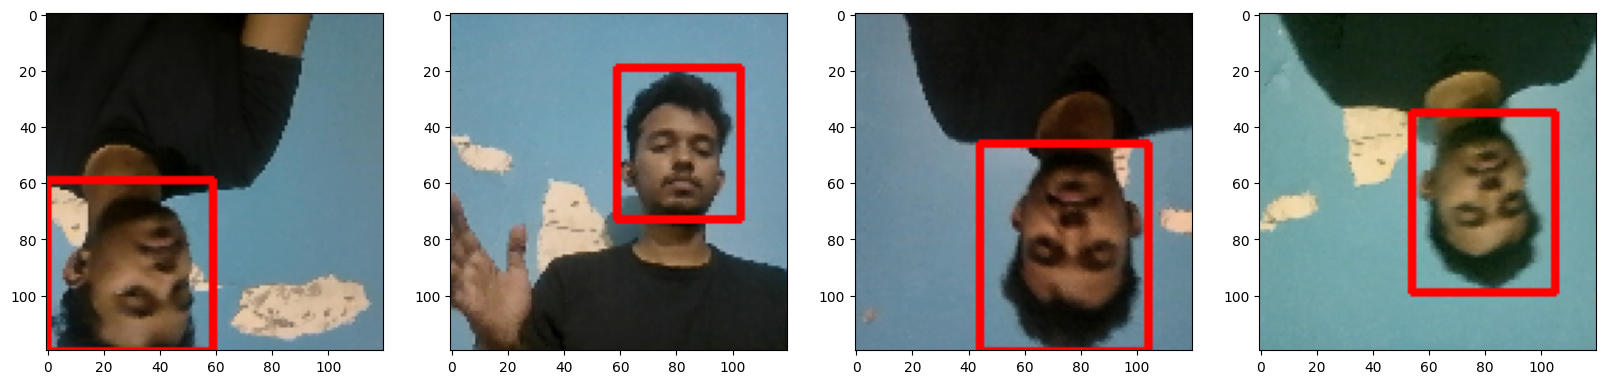

In [120]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    sample_image_writable = np.copy(sample_image)
    
    cv2.rectangle(sample_image_writable, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image_writable)

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, GlobalMaxPooling2D 
from tensorflow.keras.applications import VGG16

In [50]:
vgg = VGG16(include_top = False)

58889256/58889256 [==============================] - 78s 1us/step


In [51]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [52]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [53]:
facetracker = build_model()

In [54]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [57]:
X, y = train.as_numpy_iterator().next()

In [59]:
X.shape

(8, 120, 120, 3)

In [61]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [63]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001,decay = lr_decay)

In [64]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [65]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [70]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 9s 9s/step


In [71]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.497301>

In [72]:
classloss(y[0],classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.49474406>

In [73]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [74]:
model = FaceTracker(facetracker)

In [75]:
model.compile(opt,classloss,regressloss)

In [76]:
logdir = 'logs'

In [78]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [96]:
hist = model.fit(train.take(100) ,epochs = 30 ,validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/30
100/100 [==============================] - 22s 117ms/step - total_loss: 0.0010 - class_loss: 4.5486e-07 - regress_loss: 0.0010 - val_total_loss: 0.1465 - val_class_loss: 5.2154e-07 - val_regress_loss: 0.1465
Epoch 2/30
100/100 [==============================] - 18s 111ms/step - total_loss: 8.7898e-04 - class_loss: 3.8094e-07 - regress_loss: 8.7879e-04 - val_total_loss: 0.0100 - val_class_loss: 1.2517e-06 - val_regress_loss: 0.0100
Epoch 3/30
100/100 [==============================] - 20s 115ms/step - total_loss: 7.6957e-04 - class_loss: 4.0337e-07 - regress_loss: 7.6937e-04 - val_total_loss: 0.0168 - val_class_loss: 4.4703e-08 - val_regress_loss: 0.0168
Epoch 4/30
100/100 [==============================] - 19s 115ms/step - total_loss: 0.0010 - class_loss: 5.0067e-07 - regress_loss: 0.0010 - val_total_loss: 0.0342 - val_class_loss: 1.1325e-06 - val_regress_loss: 0.0342
Epoch 5/30
100/100 [==============================] - 19s 115ms/step - total_loss: 9.2879e-04 - class_loss: 

In [97]:
hist.history

{'total_loss': [0.00043284957064315677,
  0.0023482695687562227,
  0.0008206663187593222,
  0.0006721941754221916,
  0.0006226018304005265,
  0.0011688298545777798,
  0.0008371123694814742,
  0.0003961021429859102,
  0.0003174946177750826,
  0.0005499506951309741,
  0.00034087602398358285,
  0.0008826885605230927,
  0.0007513081654906273,
  0.000708376057446003,
  0.0015457246918231249,
  0.0007880449993535876,
  0.0016083087539300323,
  0.0026132562197744846,
  0.00045626453356817365,
  0.0007286742329597473,
  0.0007196738151833415,
  0.000323234562529251,
  0.0012795890215784311,
  0.0006261927192099392,
  0.0009335236391052604,
  0.0007020594784989953,
  0.0009530524257570505,
  0.0013086074031889439,
  0.0007769834483042359,
  0.000653502531349659],
 'class_loss': [5.662449780174938e-07,
  7.450582728552035e-08,
  7.4505820180093e-08,
  2.682211857063521e-07,
  8.940698137394065e-08,
  3.278259725902899e-07,
  4.0233157960756216e-07,
  3.4272693483217154e-07,
  -0.0,
  2.451251930

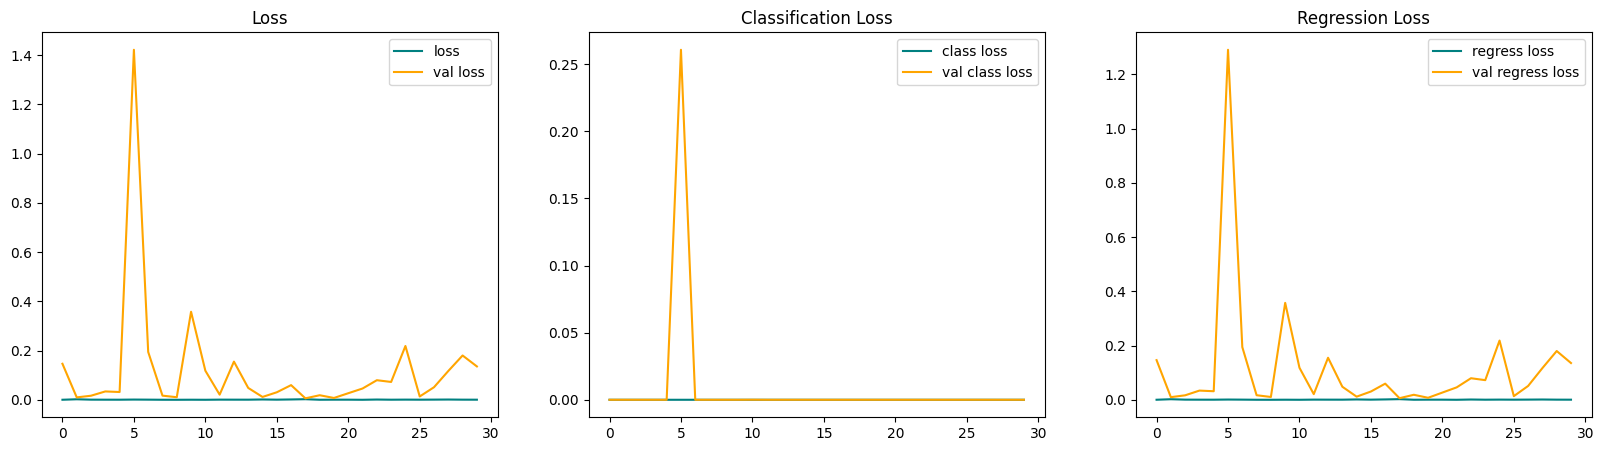

In [98]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

1/1 [==============================] - 0s 27ms/step


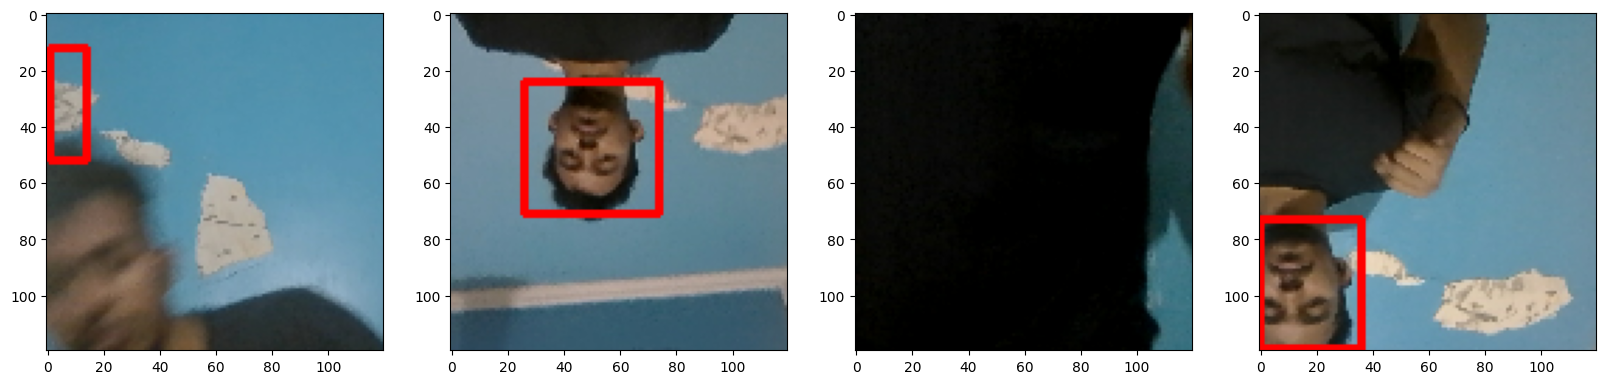

In [127]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    sample_image_writable = np.copy(sample_image)
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image_writable, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image_writable)

In [94]:
from tensorflow.keras.models import load_model

In [101]:
facetracker.save('facetracker.h5')

In [104]:
facetracker = load_model('facetracker.h5')


In [108]:
happysad = load_model('happysadimagemodel2.h5')

In [116]:
cap = cv2.VideoCapture(0)

cap.release()
cv2.destroyAllWindows()

In [128]:
cap = cv2.VideoCapture(0)
mood = ''
currframe = 0
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    if currframe%30 == 0:
        resize = cv2.resize(rgb, (256,256))
        yhat1 = happysad.predict(np.expand_dims(resize/255,0))
    if yhat1>0.5:
        mood = "sad"
    else :
        mood = "happy"
    cv2.putText(
    frame, #numpy array on which text is written
    mood, #text
    (10,50), #position at which writing has to start
    cv2.FONT_HERSHEY_SIMPLEX, #font family
    3, #font size
    (209, 180, 220, 255), #font color
    3) #font stroke
    currframe +=1
    
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 17ms/step
